In [ ]:
#Import necessary libraries
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
root_dir = "/content/drive/MyDrive/weather dataset"

for dirpath, dirnames, filenames in os.walk(root_dir):
    print(f"Directory: {dirpath}")
    print(f"Number of images: {len(filenames)}")
    print()


Directory: /content/drive/MyDrive/weather dataset
Number of images: 0

Directory: /content/drive/MyDrive/weather dataset/train
Number of images: 0

Directory: /content/drive/MyDrive/weather dataset/train/cloud
Number of images: 207

Directory: /content/drive/MyDrive/weather dataset/train/shine
Number of images: 189

Directory: /content/drive/MyDrive/weather dataset/train/rain
Number of images: 152

Directory: /content/drive/MyDrive/weather dataset/train/sunrise
Number of images: 243

Directory: /content/drive/MyDrive/weather dataset/test
Number of images: 0

Directory: /content/drive/MyDrive/weather dataset/test/sunrise
Number of images: 61

Directory: /content/drive/MyDrive/weather dataset/test/shine
Number of images: 29

Directory: /content/drive/MyDrive/weather dataset/test/cloud
Number of images: 35

Directory: /content/drive/MyDrive/weather dataset/test/rain
Number of images: 30

Directory: /content/drive/MyDrive/weather dataset/validation
Number of images: 0

Directory: /content/

In [ ]:
def retrieve_labels(train_dir, test_dir, val_dir):
  # Retrieve labels from training directory
  train_labels = os.listdir(train_dir)
  print(f"Training labels: {train_labels}")
  print(f"Number of training labels: {len(train_labels)}")
  print()

  # Retrieve labels from test directory
  test_labels = os.listdir(test_dir)
  print(f"Test labels: {test_labels}")
  print(f"Number of test labels: {len(test_labels)}")
  print()

  # Retrieve labels from validation directory
  val_labels = os.listdir(val_dir)
  print(f"Validation labels: {val_labels}")
  print(f"Number of validation labels: {len(val_labels)}")
  print()



In [ ]:
train_dir = "/content/drive/MyDrive/weather dataset/train"
test_dir = "/content/drive/MyDrive/weather dataset/test"
val_dir = "/content/drive/MyDrive/weather dataset/validation"
retrieve_labels(train_dir, test_dir, val_dir)

Training labels: ['cloud', 'shine', 'rain', 'sunrise']
Number of training labels: 4

Test labels: ['sunrise', 'shine', 'cloud', 'rain']
Number of test labels: 4

Validation labels: ['shine', 'sunrise', 'cloud', 'rain']
Number of validation labels: 4



In [ ]:
def view_random_images(target_dir, num_images):
  """
  View num_images random images from the subdirectories of target_dir as a subplot.
  """
  # Get list of subdirectories
  subdirs = [d for d in os.listdir(target_dir) if os.path.isdir(os.path.join(target_dir, d))]

  # Select num_images random subdirectories
  random.shuffle(subdirs)
  selected_subdirs = subdirs[:num_images]

  # Create a subplot
  fig, axes = plt.subplots(1, num_images, figsize=(15,9))
  for i, subdir in enumerate(selected_subdirs):
      # Get list of images in subdirectory
      image_paths = [f for f in os.listdir(os.path.join(target_dir, subdir))]
      # Select a random image
      image_path = random.choice(image_paths)
      # Load image
      image = plt.imread(os.path.join(target_dir, subdir, image_path))
      # Display image in subplot
      axes[i].imshow(image)
      axes[i].axis("off")
      axes[i].set_title(subdir)
  print(f"Shape of image: {image.shape}")    #width, height, colour channels
  plt.show()



Shape of image: (273, 185, 3)


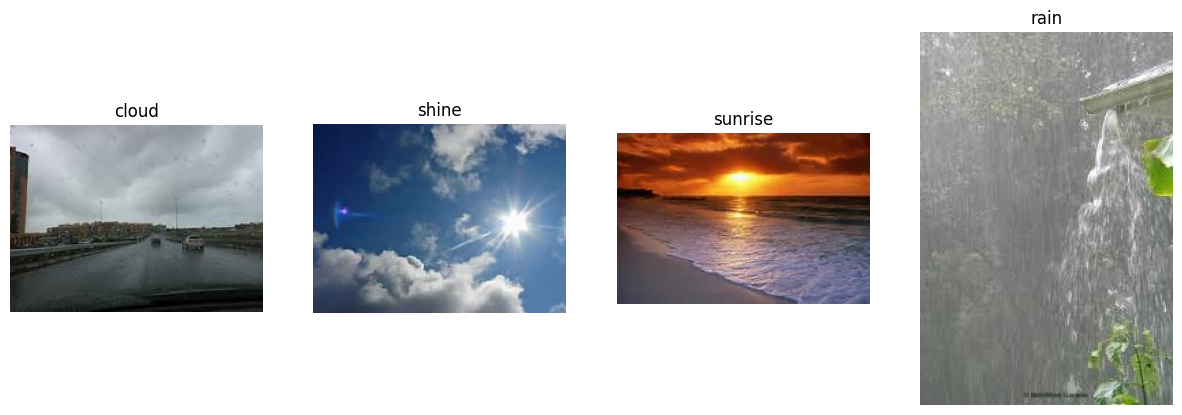

In [ ]:
view_random_images(target_dir="/content/drive/MyDrive/weather dataset/test/", num_images=4)

In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/weather dataset/train/"
val_dir = "/content/drive/MyDrive/weather dataset/validation/"
test_dir = "/content/drive/MyDrive/weather dataset/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=64, # number of images to process at a time
                                               target_size=(224,224), # convert all images to be 224 x 224
                                               class_mode="categorical")

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=64,
                                               target_size=(224,224),
                                               class_mode="categorical")
test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=64,
                                               target_size=(224,224),
                                               class_mode="categorical")


Found 791 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 155 images belonging to 4 classes.


In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=16,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), #(height, width, colour channels)
tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1050, activation="relu"),
  tf.keras.layers.Dense(4, activation="softmax") # multiclass activation output
])

# Compile the model
model_1.compile(loss="CategoricalCrossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        validation_data=valid_data,
                        )

Epoch 1/10
13/13 [==============================] - 215s 16s/step - loss: 64.3153 - accuracy: 0.4374 - val_loss: 9.5344 - val_accuracy: 0.5642
Epoch 2/10
13/13 [==============================] - 6s 454ms/step - loss: 6.3853 - accuracy: 0.6789 - val_loss: 1.1172 - val_accuracy: 0.8603
Epoch 3/10
13/13 [==============================] - 6s 459ms/step - loss: 1.9490 - accuracy: 0.8129 - val_loss: 0.8797 - val_accuracy: 0.8771
Epoch 4/10
13/13 [==============================] - 7s 509ms/step - loss: 1.2119 - accuracy: 0.8344 - val_loss: 0.7861 - val_accuracy: 0.8771
Epoch 5/10
13/13 [==============================] - 7s 534ms/step - loss: 0.4651 - accuracy: 0.8875 - val_loss: 0.7015 - val_accuracy: 0.8436
Epoch 6/10
13/13 [==============================] - 6s 436ms/step - loss: 0.2190 - accuracy: 0.9191 - val_loss: 0.3940 - val_accuracy: 0.8603
Epoch 7/10
13/13 [==============================] - 6s 496ms/step - loss: 0.1219 - accuracy: 0.9558 - val_loss: 0.4332 - val_accuracy: 0.8659
Epoch

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 197136)            0         
                                                                 
 dense (Dense)               (None, 1050)              206993850 
                                                                 
 dense_1 (Dense)             (None, 4)                 4204      
                                                                 
Total params: 206998502 (789.64 MB)
Trainable params: 206998502 (789.64 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [ ]:
model_1.evaluate(test_data)

3/3 [==============================] - 26s 13s/step - loss: 0.7252 - accuracy: 0.8839


[0.725208580493927, 0.8838709592819214]

In [ ]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(1200, activation='relu'),
  tf.keras.layers.Dense(600, activation='relu'),
   tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=10,
                        validation_data=valid_data)


Epoch 1/10
13/13 [==============================] - 8s 424ms/step - loss: 121.8549 - accuracy: 0.3021 - val_loss: 19.2646 - val_accuracy: 0.5307
Epoch 2/10
13/13 [==============================] - 6s 502ms/step - loss: 16.0141 - accuracy: 0.5019 - val_loss: 17.8874 - val_accuracy: 0.5363
Epoch 3/10
13/13 [==============================] - 6s 447ms/step - loss: 8.8773 - accuracy: 0.5525 - val_loss: 4.2968 - val_accuracy: 0.6648
Epoch 4/10
13/13 [==============================] - 6s 435ms/step - loss: 4.0095 - accuracy: 0.6334 - val_loss: 2.8438 - val_accuracy: 0.6592
Epoch 5/10
13/13 [==============================] - 7s 519ms/step - loss: 1.9662 - accuracy: 0.7181 - val_loss: 2.1314 - val_accuracy: 0.6536
Epoch 6/10
13/13 [==============================] - 6s 457ms/step - loss: 1.7397 - accuracy: 0.7307 - val_loss: 1.3206 - val_accuracy: 0.7598
Epoch 7/10
13/13 [==============================] - 7s 518ms/step - loss: 1.3458 - accuracy: 0.7320 - val_loss: 1.0803 - val_accuracy: 0.7989
E

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 1200)              180634800 
                                                                 
 dense_3 (Dense)             (None, 600)               720600    
                                                                 
 dense_4 (Dense)             (None, 300)               180300    
                                                                 
 dense_5 (Dense)             (None, 4)                 1204      
                                                                 
Total params: 181536904 (692.51 MB)
Trainable params: 181536904 (692.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=10,
                        validation_data=valid_data)


Epoch 1/10
13/13 [==============================] - 8s 398ms/step - loss: 77.7797 - accuracy: 0.2718 - val_loss: 28.8177 - val_accuracy: 0.4693
Epoch 2/10
13/13 [==============================] - 6s 462ms/step - loss: 15.4827 - accuracy: 0.4235 - val_loss: 7.3076 - val_accuracy: 0.4302
Epoch 3/10
13/13 [==============================] - 6s 481ms/step - loss: 3.3929 - accuracy: 0.6068 - val_loss: 0.9150 - val_accuracy: 0.7318
Epoch 4/10
13/13 [==============================] - 6s 440ms/step - loss: 1.5116 - accuracy: 0.6915 - val_loss: 1.5310 - val_accuracy: 0.6034
Epoch 5/10
13/13 [==============================] - 7s 524ms/step - loss: 0.9300 - accuracy: 0.7598 - val_loss: 1.7394 - val_accuracy: 0.5531
Epoch 6/10
13/13 [==============================] - 6s 437ms/step - loss: 1.0061 - accuracy: 0.6928 - val_loss: 2.2675 - val_accuracy: 0.6034
Epoch 7/10
13/13 [==============================] - 6s 498ms/step - loss: 1.3705 - accuracy: 0.7004 - val_loss: 1.4283 - val_accuracy: 0.6592
Epo

In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 1000)              150529000 
                                                                 
 dense_7 (Dense)             (None, 500)               500500    
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dense_9 (Dense)             (None, 4)                 2004      
                                                                 
Total params: 151282004 (577.10 MB)
Trainable params: 151282004 (577.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def evaluate_models(models, model_names,test_data):
    # Import the required library
    import pandas as pd

    # Initialize lists for the results
    losses = []
    accuracies = []

    # Iterate over the models
    for model in models:
        # Evaluate the model
        loss, accuracy = model.evaluate(test_data)
        losses.append(loss)
        accuracies.append(accuracy)
       # Convert the results to percentages
    losses = [round(loss * 100, 2) for loss in losses]
    accuracies = [round(accuracy * 100, 2) for accuracy in accuracies]

    # Create a dataframe with the results
    results = pd.DataFrame({"Model": model_names,
                            "Loss": losses,
                            "Accuracy": accuracies})

    return results


In [ ]:
# Define the models and model names
models = [model_1, model_2, model_3]
model_names = ["Model 1", "Model 2", "Model 3"]

# Evaluate the models
results = evaluate_models(models, model_names,test_data)

# Display the results
results


3/3 [==============================] - 1s 163ms/step - loss: 0.7135 - accuracy: 0.7613


,Model,Loss,Accuracy
0,Model 1,72.52,88.39
1,Model 2,102.28,76.77
2,Model 3,71.35,76.13


In [ ]:
def plot_loss_accuracy(history_1):
  # Extract the loss and accuracy history for both training and validation data
  loss = history_1.history['loss']
  val_loss = history_1.history['val_loss']
  acc = history_1.history['accuracy']
  val_acc = history_1.history['val_accuracy']

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

  # Plot the loss history
  ax1.plot(loss, label='Training loss')
  ax1.plot(val_loss, label='Validation loss')
  ax1.set_title('Loss history')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()

  # Plot the accuracy history
  ax2.plot(acc, label='Training accuracy')
  ax2.plot(val_acc, label='Validation accuracy')
  ax2.set_title('Accuracy history')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

  plt.show()


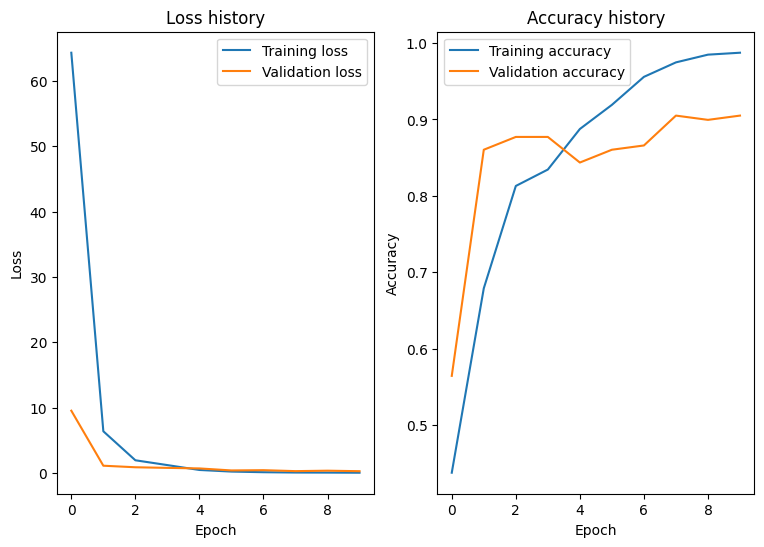

In [ ]:
# Lets plot the training and validation loss and accuruacy
plot_loss_accuracy(history_1)